In [30]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
from fastai.vision import *

In [16]:
%reload_ext autoreload
#path = untar_data(URLs.ADULT_SAMPLE)
#df = pd.read_csv(path/'adult.csv')

In [17]:
path = f'images/part-1/'
files = !ls {PATH} | head
print(files)

['ls: cannot access {PATH}: No such file or directory']


In [33]:
folder = 'peacocks-1'
file = 'peacocks-1.txt'

In [34]:
path = Path('images/part-1')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [35]:
download_images(path/folder/file, dest, max_pics=200)

Error https://www.ctvnews.ca/polopoly_fs/1.3910753.1525211486!/httpImage/image.jpg_gen/derivatives/landscape_960/image.jpg 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=520753761604435 'content-length'
Error https://r.hswstatic.com/u_0/w_480/gif/peacock-feathers-452402573-crop.jpg 'content-length'


In [57]:
folder = 'pigeons-1'
file = 'pigeons-1.txt'

In [58]:
path = Path('images/part-1')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [45]:
classes = ['peacocks-1','pigeons-1']

In [32]:
download_images(path/folder/file, dest, max_pics=200)

Error http://www.pigeonrescue.org/wp-content/uploads/2013/02/EllenByJoeyConcepcionP1060631.jpg 'content-length'
Error http://www.pigeonrescue.org/wp-content/uploads/2013/05/DSCF1594.jpg 'content-length'
Error https://ovocontrol.com/wp-content/uploads/2018/03/rock-dove-pigeon-control-1024x1024.png 'content-length'
Error https://spaceplace.nasa.gov/review/pigeons/racing-pigeon-lrg.en.png 'content-length'
Error https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=986781758033154 'content-length'
Error https://r.hswstatic.com/w_907/gif/podcasts/stuffyoushouldknow-podcasts-wp-content-uploads-sites-16-2015-08-pigeon600x350.jpg 'content-length'


In [59]:
for c in classes:
    print(c)
verify_images(path/folder, delete=True)

peacocks-1
pigeons-1


/home/ec2-user/SageMaker/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file '/home/ec2-user/SageMaker/course-v3/nbs/dl1/images/part-1/pigeons-1/00000009.jpg'
cannot identify image file '/home/ec2-user/SageMaker/course-v3/nbs/dl1/images/part-1/pigeons-1/00000011.jpg'
cannot identify image file '/home/ec2-user/SageMaker/course-v3/nbs/dl1/images/part-1/pigeons-1/00000083.jpg'
cannot identify image file '/home/ec2-user/SageMaker/course-v3/nbs/dl1/images/part-1/pigeons-1/pigeons-1.txt'
cannot identify image file '/home/ec2-user/SageMaker/course-v3/nbs/dl1/images/part-1/pigeons-1/00000084.jpg'


In [60]:
import numpy as np
np.random.seed(42)
print(path)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

images/part-1


/home/ec2-user/SageMaker/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


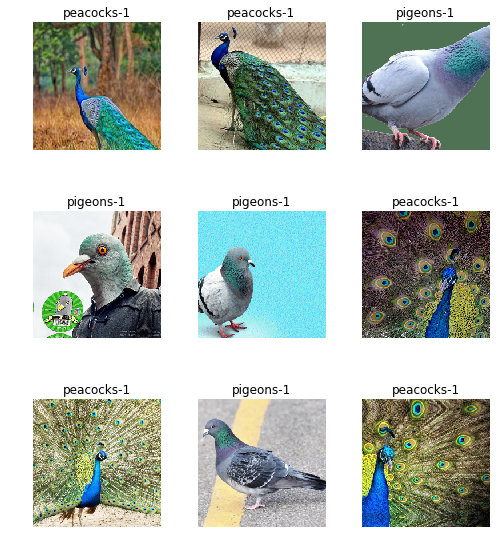

In [70]:

data.show_batch(rows=3, figsize=(7,8))

In [62]:

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['peacocks-1', 'pigeons-1'], 2, 137, 45)

In [63]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/ec2-user/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 42845854.93it/s]


In [64]:
learn.fit_one_cycle(4)

Total time: 00:32
epoch  train_loss  valid_loss  error_rate
1      0.937553    0.650748    0.400000    (00:10)
2      0.555566    0.224036    0.111111    (00:06)
3      0.374210    0.124630    0.066667    (00:07)
4      0.285076    0.095303    0.066667    (00:07)



In [65]:
learn.save('stage-1')

In [66]:
learn.unfreeze()

In [67]:

learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


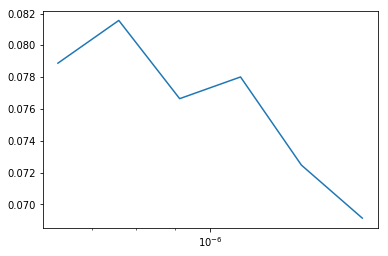

In [68]:

learn.recorder.plot()

In [69]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

Total time: 00:15
epoch  train_loss  valid_loss  error_rate
1      0.029558    0.046927    0.000000    (00:07)
2      0.023277    0.045359    0.022222    (00:07)



In [74]:

learn.save('stage-2')

In [75]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ec2-user/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 44183891.03it/s]


In [76]:
learn.fit_one_cycle(4)

Total time: 00:44
epoch  train_loss  valid_loss  error_rate
1      0.647453    0.085761    0.022222    (00:18)
2      0.322401    0.009040    0.000000    (00:08)
3      0.213202    0.005715    0.000000    (00:08)
4      0.170008    0.007046    0.000000    (00:08)



In [77]:
learn.save('stage-3')

In [78]:
learn.unfreeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


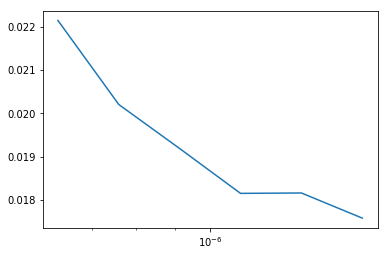

In [80]:
learn.lr_find()
learn.recorder.plot()

In [81]:
learn.fit_one_cycle(10, max_lr = 5e-3)

Total time: 01:32
epoch  train_loss  valid_loss  error_rate    
1      0.248596    15.195741   0.577778        (00:08)
2      0.622197    434.555817  0.533333        (00:08)
3      0.672130    3795045.000000  0.422222    (00:09)
4      0.804665    2420.466553  0.422222       (00:09)
5      0.751079    7381.404297  0.422222       (00:08)
6      0.734317    689.523254  0.422222        (00:09)
7      0.700206    60.811123   0.311111        (00:10)
8      0.673651    62.134590   0.555556        (00:10)
9      0.629179    13.585988   0.422222        (00:09)
10     0.596932    3.712962    0.355556        (00:09)



In [82]:
interp = ClassificationInterpretation.from_learner(learn)

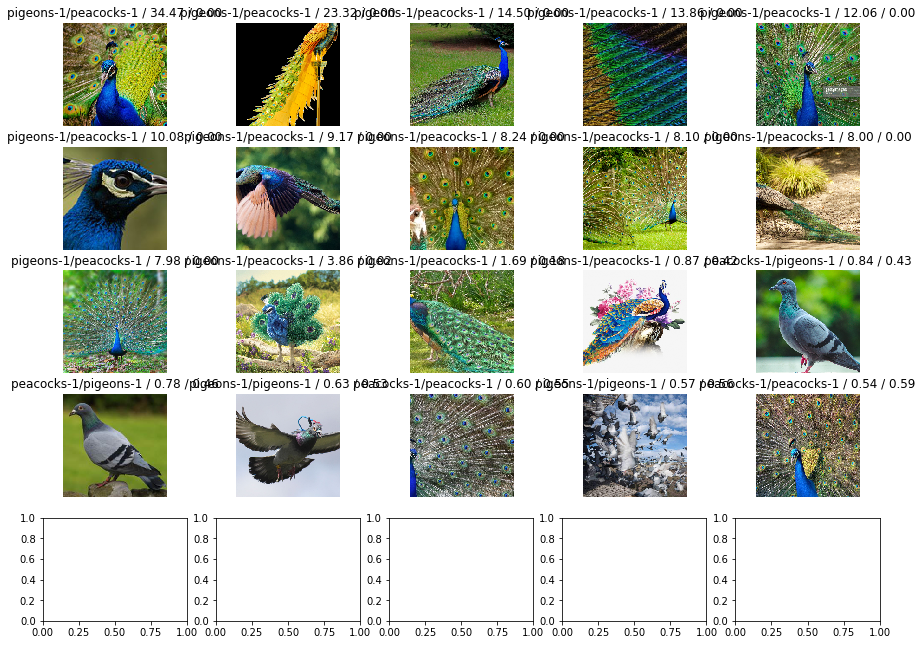

In [86]:
interp.plot_top_losses(20, figsize=(15,11))

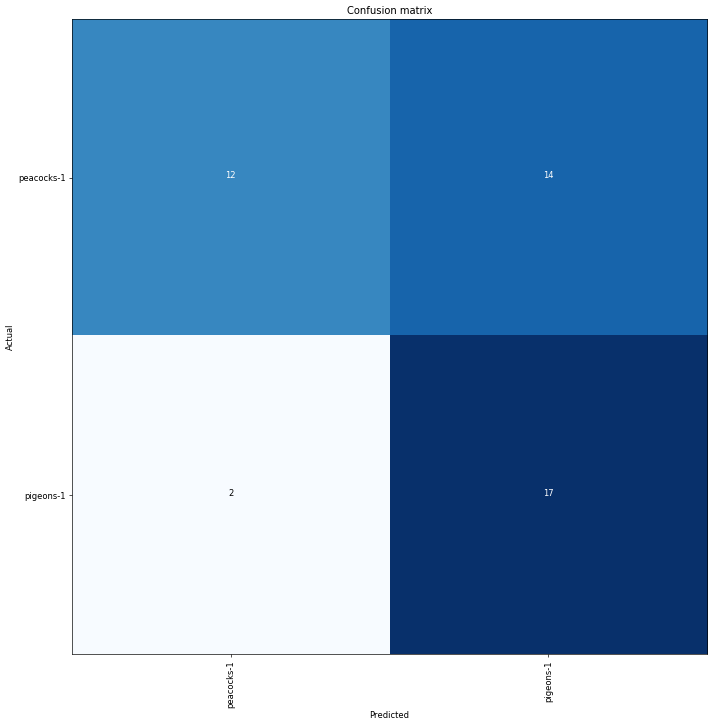

In [84]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [85]:
interp.most_confused(min_val=2)

[('peacocks-1', 'pigeons-1', 14)]